<a href="https://colab.research.google.com/github/Ivan412/training/blob/main/6_python_advaced/1_analysis/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Продвинутый Python. Часть 1: Линейная регрессия.

---


#**Задание: предсказание на 2020 год**

Возьмите данные по безработице в городе Москва:

https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv

Сгруппируйте данные по годам, и, если в году меньше 6 значений, отбросьте эти годы.

Постройте модель линейной регрессии по годам среднего значения отношения UnemployedDisabled к UnemployedTotal (процента людей с ограниченными возможностями) за месяц и ответьте, какое ожидается значение процента безработных инвалидов в 2020 году при сохранении текущей политики города Москвы?

Ответ округлите до сотых. Например, 2,32

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [84]:
#загрузим данные
columns=['Year', 'UnemployedDisabled', 'UnemployedTotal']
data = pd.read_csv('https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv', delimiter=';', decimal=',', na_values="NA", usecols=columns)

In [85]:
#отфильтруем года, для которых менее 6 измерений и найдем средние по годам
data_avg = data.groupby('Year').filter(lambda x: x['UnemployedTotal'].count() >= 6).groupby('Year').mean()
#построим массив с долей безработных инвалидов по годам
data_disabled = data_avg['UnemployedDisabled'] / data_avg['UnemployedTotal']

In [86]:
#подготовим данные для модели
x = np.array(data_disabled.index).reshape(-1, 1)
y = np.array(data_disabled.values).reshape(-1, 1)

In [87]:
#создадим модель и получим предсказания
model = LinearRegression().fit(x, y)
predict2020 = np.round(model.predict([[2020]])[0][0]*100, 2)
print(f'Предсказанная доля безработных инвалидов в 2020г: {predict2020}%')

Предсказанная доля безработных инвалидов в 2020г: 1.52%


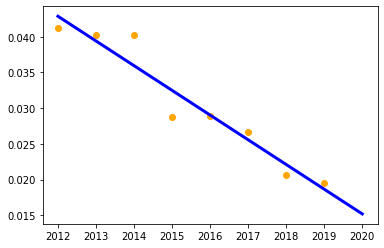

In [88]:
#построим график
#передадим в скаттер набор точек
plt.scatter(x, y, color="orange")
#продлим x следующим значением
x = np.append(x, [2020]).reshape(-1, 1)
#построим линию от x. y вычислим на ходу(model.predict(x))
plt.plot(x, model.predict(x), color="blue", linewidth=3)
plt.show()